<div style="display:flex; justify-content:column;  text-align:center;">
    <img style="width:90px; height:130px; margin-top:30px;" src="fs.png" />
    <h1 style="width:500px; font-size:34px; font-weight:400px; font-family:Serif; ">Faculté des Sciences et Techniques de Tanger Département Génie Informatique</h1>
    <img style="width:90px; height:130px; margin-top:30px;" src="fst.jpg" />
</div>

<div style="margin-top:60px">
    <h1 style="color:#3498db; font-size:30px; text-align : center">Mini-projet</h1>
    <h1 style="color:##f39c12; font-size:30px; text-align : center">Réseaux de neurones artificiels</h1>
</div>

<img style="width:550px; height:350px; margin-top:25px; " src="img2.png"/>

<div style="display:flex; justify-content:column;  text-align:center; margin-top:20px; margin-bottom:20px;">
    <div style="margin-right:550px; margin-left:70px">
        <h3 style="color:#3498db;">Encadré par : </h3>
        <h4>Mr.AIT KBIR</h4>
    </div>
    <div >
        <h3 style="color:#3498db;">Réalisé par : </h3>
        <h4>ZEROUALI Hajar</h4>
        <h4>CHERKAOUI Rabab</h4>
        <h4>GHARBI Hafsa</h4>
    </div>    
</div>   

<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">Introduction : </h2>
        <p  style="font-family:Serif; font-size:17px;">Depuis le début de la décennie 1990, les réseaux de neurones artificiels habituellement utilisés en physique appliquée font leur entrée dans les sciences de gestion en tant que méthode quantitative de prévision, à côté des méthodes statistiques classiques. Et la finance n’échappe pas à l’emploi de ce type de méthodes ou techniques modernes. Le réseau de neurones est utilisé à des fins de prévision, de classification et de reconnaissance de forme en général, pour ceci nous allons l’implémenter sur un problème de prédiction qui est « La prédiction du mouvement des prix dans l'indice S&P 500</p>
</div>

<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">But : </h2>
        <p  style="font-family:Serif; font-size:17px;">Développer une application pour implémenter les solutions apportées par les modèles
        de réseaux de neurones artificiels au problème de prédiction du mouvement des prix dans l'indice S&P 500.</p>
</div>

<div>
    <h2 style="font-family:Serif; color:#f39c12; font-size:27px; margin-bottom:0">Problème 1 : </h2>
        <p style="font-family:Serif; font-size:17px;">Problème de prédiction du mouvement des prix dans l'indice S&P 500, à partir des valeurs
antérieures de l’indice. Le S&P 500 est un indice boursier basé sur 500 grandes sociétés cotées
sur les bourses américaines. L'indice est possédé et géré par Standard & Poor's, l'une des trois
principales sociétés de notation financière du marché boursier américain. Lien de récupération
des données : 
    <a style="color:blue;" href="https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC">https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC</a></p>
</div>

<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">1 - L'importation des données </h2>
        <p  style="font-family:Serif; font-size:17px;">Dans un premier temps on importe les bibliothèques dont on aura besoin :</p>
</div>

In [1]:
from pandas_datareader import data as pdr
from datetime import date
import numpy as np
# Import sklearn 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns  # Bibliothèque pour la visualisation des données
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pylab import rcParams

<div>
        <p  style="font-family:Serif; font-size:17px;">On utilise la bibliothèque <b>pandas_datareader</b> pour récupérer les données, puis on les enregitres dans un fichier csv : <b>" S&P5000.csv"</b> </p>
</div>

In [2]:
#Date de début 
debut = date(2005,1,1)
#Date de fin
fin = date(2010,1,1)
#Récupération des données
dataSet = pdr.DataReader('^GSPC','yahoo', debut, fin)
#Enregistrement des données
dataSet.to_csv('./S&P5000' + '.csv')
#Affichage
dataSet

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1217.800049,1200.319946,1211.920044,1202.079956,1510800000,1202.079956
2005-01-04,1205.839966,1185.390015,1202.079956,1188.050049,1721000000,1188.050049
2005-01-05,1192.729980,1183.719971,1188.050049,1183.739990,1738900000,1183.739990
2005-01-06,1191.630005,1183.270020,1183.739990,1187.890015,1569100000,1187.890015
2005-01-07,1192.199951,1182.160034,1187.890015,1186.189941,1477900000,1186.189941
...,...,...,...,...,...,...
2009-12-24,1126.479980,1121.079956,1121.079956,1126.479980,1267710000,1126.479980
2009-12-28,1130.380005,1123.510010,1127.530029,1127.780029,2716400000,1127.780029
2009-12-29,1130.380005,1126.079956,1128.550049,1126.199951,2491020000,1126.199951


In [3]:
#Affichage des dimentions du tableau
print(dataSet["Close"].shape)

(1259,)


<div>
        <p  style="font-family:Serif; font-size:17px;">On met une copie des données : </p>
</div>

In [4]:
copie = dataSet.copy()

<div>
        <p  style="font-family:Serif; font-size:17px;">On visualise les données selon le prix et la date : </p>
</div>

Text(0.5, 1.0, 'Low & High')

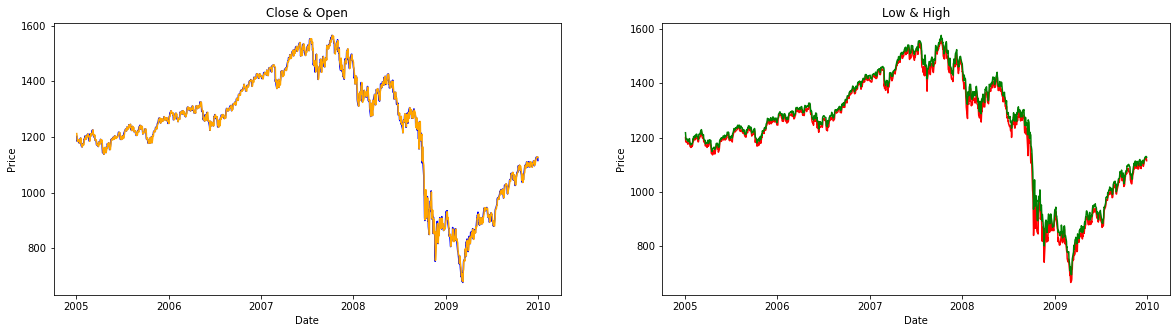

In [5]:
# visualisation des données dans le graphe
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.plot(dataSet['Close'], color="blue")
ax1.plot(dataSet["Open"], color="orange")

ax1.set_xlabel("Date", fontsize=10)
ax1.set_ylabel("Price")
ax1.set_title("Close & Open")

ax2.plot(dataSet["Low"], color="red")
ax2.plot(dataSet["High"], color="green")

ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("Price")
ax2.set_title("Low & High")

<div>
        <p  style="font-family:Serif; font-size:17px;">On réinitialise les index : </p>
</div>

In [6]:
#Changement de l'ordre de la colonne "Close"
dataSet = dataSet[['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Close']]
#Réinitialisation des index
dataSet = dataSet.reset_index()
dataSet

,Date,High,Low,Open,Volume,Adj Close,Close
0,2005-01-03,1217.800049,1200.319946,1211.920044,1510800000,1202.079956,1202.079956
1,2005-01-04,1205.839966,1185.390015,1202.079956,1721000000,1188.050049,1188.050049
2,2005-01-05,1192.729980,1183.719971,1188.050049,1738900000,1183.739990,1183.739990
3,2005-01-06,1191.630005,1183.270020,1183.739990,1569100000,1187.890015,1187.890015
4,2005-01-07,1192.199951,1182.160034,1187.890015,1477900000,1186.189941,1186.189941
...,...,...,...,...,...,...,...
1254,2009-12-24,1126.479980,1121.079956,1121.079956,1267710000,1126.479980,1126.479980
1255,2009-12-28,1130.380005,1123.510010,1127.530029,2716400000,1127.780029,1127.780029
1256,2009-12-29,1130.380005,1126.079956,1128.550049,2491020000,1126.199951,1126.199951
1257,2009-12-30,1126.420044,1121.939941,1125.530029,2277300000,1126.420044,1126.420044


<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">2 - L'entraînement des données </h2>
        <p  style="font-family:Serif; font-size:17px;">On utilise MinMaxScaler pour calibrer les données sur une plage de valeurs (entre 0 et 1)</p>
</div>

In [7]:
# Normaliser data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataSet['Close'].values.reshape(-1,1))

print(scaled_data.shape)

(1259, 1)


<div>
        <p  style="font-family:Serif; font-size:17px;">On divise les données comme suit : 70% pour l'entrainement et on laisse 30% pour le test </p>
</div>

In [8]:
# Division des données pour l'entrainement 
training_size = int(len(scaled_data) * 0.70)
test_size = len(scaled_data) - training_size

train_data = scaled_data[0:training_size,:]
test_data = scaled_data[training_size:len(scaled_data),:]

<div>
    <p  style="font-family:Serif; font-size:17px;">On créé une fonction qui va nous permettre de convertir un tableau de données en matrice de données :</p>
</div>

In [9]:
# fonction de Construction de dataset
def construire(dataset, time_step=5):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step-1):
		tmp = dataset[i:(i+time_step), 0]
		dataX.append(tmp)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

<div>
        <p  style="font-family:Serif; font-size:17px;">La construction des données de tests et d'entraînements :</p>
</div>

In [10]:
# Construire data utilisé au niveau d'entrainement
time_step = 30
trainX, trainY = construire(train_data, time_step)

trainY=trainY.reshape(-1,1)

<div>
    <h3 style="color:#3498db; font-family:Serif; font-size:22px;">Algorithme de retro-propagation du gradient</h3>   
    <p style="font-family:Serif; font-size:17px;">Dans le but de resoudre le problème de prédiction du mouvement des prix dans l'indice S&P500, nous avons implémenté l'algorithme de retro-propagation du gradient qui est un algorithme d’optimisation permettant d’ajuster les paramètres d’un réseau de neurones multicouches pour mettre en correspondance des entrées et des sorties référencées dans une base d’apprentissage.
        <br> Cet algorithme fonctionne selon les étapes suivantes :  </p>
    <div style="display:flex">
 <h3 style="color:##f39c12; margin-left:20px;">1-</h3><p style="font-family:Serif; font-size:17px;">Initialiser les paramètres libres du réseau (poids synaptiques et biais). </p>
        </div>
    <div style="display:flex">
    <h3 style="color:##f39c12; margin-left:20px;">2-</h3>  <p style="font-family:Serif; font-size:17px;"> Présenter un nouvel exemple avec la réponse disérée correspondante (les exemples de la base d'apprentissage sont présentés un par un). </p>
        </div>
       <div style="display:flex">
    <h3 style="color:##f39c12; margin-left:20px;">3-</h3><p style="font-family:Serif; font-size:17px;">   Calculer l'état actuel des neurones du réseau, par la propagation du flux d'activation de couche et dans le sens direct. </p>
            </div>
     <div style="display:flex">
    <h3 style="color:##f39c12; margin-left:20px;">4-</h3>  <p style="font-family:Serif; font-size:17px;">    Adaptation des paramètres libres du réseau, en tenant compte de la position du neurone dans le réseau et des valeurs courantes (instant t) des paramètres libre du réseau. </p>
         </div>
    <div style="display:flex">
    <h3 style="color:##f39c12; margin-left:20px;">5-</h3>
       <p style="font-family:Serif; font-size:17px;">   Si le critère d'arret est atteint, stopper la procédure, si non, aller à l'étape 2. </p>
    </div>
</div>

In [11]:
class MultiLayerPerceptron:
    
    def __init__(self, arch , alpha = 0.1):
        # poids + biais
        self.W = {}
        self.B = {}
        
        # Taux d'adaptation
        self.alpha = alpha
        
        # Architecture :nbre de couches et nombre de neurones par couche
        self.arch = arch
        
        # Initialisation des poids: valeurs issues d'une distribution normale
        for i in np.arange(1,len(self.arch)):
            # Poids
            w = np.random.randn(self.arch[i], self.arch[i-1])
            self.W[i] = w/np.sqrt(self.arch[i])
            # Bias
            b = np.random.randn(self.arch[i],1)
            self.B[i] = b/np.sqrt(self.arch[i])            
            
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def dsigmoid(self, x): # x correspond ici à sigmoid(uj(t)), voir le cours
        return x * (1 - x)
    
     # Calcul et mémorisation de l'état de tous les neurones du réseau 
    def forward_pass(self, x):
        a = np.atleast_2d(x).T
        
        stats = {}
        stats[0] = a
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
            stats[layer] = a
        return stats    
    
    # Sortie du réseau associée à une entrée X (les états des autres neurones ne sont pas mémorisés)
    def predict(self, X):
        a = np.atleast_2d(X).T
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
        return a
    
    # Calcul de l'erreur quadratique moyenne
    def quadratic_loss(self, X, Y):
        Y = np.atleast_2d(Y).T
        predictions = self.predict(X)
#         print(predictions)
        n = X.shape[0]
        loss = (1/n) * 0.5 * np.sum((predictions - Y) ** 2) 
        return loss 
    
    # Calcul des gradients locaux 
    def compute_gradient(self, x, y):
     
        L = len(self.arch) - 1 # indice de la couche de sortie 
        # Gradients
        Gw = {}
        Gb = {}
        A = self.forward_pass(x)
        # Les vecteurs delta  
        D = {}
        y = np.atleast_2d(y).T
        deltaL = (A[L] - y) * self.dsigmoid(A[L])
        D[L] = deltaL # Pour la sortie 
        
        # Calculer les vecteurs delta des autres couches en utilisants les vecteurs delta de la couche suivante
        for l in np.arange(L-1, 0, -1):
            D[l] = (self.W[l+1].T.dot(D[l+1])) * self.dsigmoid(A[l])
        for l in np.arange(L, 0, -1):
            Gb[l] = D[l]
            Gw[l] = D[l].dot(A[l-1].T)        
       
        return (Gw, Gb)
    
    # Mise à jour par rapport à l'erreur moyenne (relative à un bloc d'exemples)
    def update_with_bloc(self, bloc):
      
        m = len(bloc)
        # Gradients locaux
        GCw = {}
        GCb = {}
        # Initialiser à zeros 
        for i in np.arange(1,len(self.arch)):
            GCw[i] = np.zeros(self.W[i].shape)
            GCb[i] = np.zeros(self.B[i].shape)
            
        # Calcul des gradients
        for x, y in bloc:
            Gw, Gb = self.compute_gradient(x, y)
            for i in np.arange(1,len(self.arch)): 
                GCw[i] += Gw[i]
                GCb[i] += Gb[i]
                
        # Mettre à jour les poids 
        for l in np.arange(1,len(self.arch)):
            self.W[l] = self.W[l] - (self.alpha/m)*(GCw[l])
            self.B[l] = self.B[l] - (self.alpha/m)*(GCb[l])
    
    # Iteration: entrainement en utilisant tous les exemples, un bloc de taille bloc_size chaque fois
    def train(self, D, bloc_size):
        train_size = len(D) #size = 881
        np.random.shuffle(D) # tirage au sort
        blocs = [D[k : k + bloc_size] # Bloc d'exemples
            for k in range(0, train_size, bloc_size)]
        
        for bloc in blocs: # Mise à jour suite au passage de chaque bloc
            self.update_with_bloc(bloc)
  
    # Apprentissage
    # X: trainX & Y: trainY
    def fit(self, X, Y, bloc_size = 20, iterations = 10000, error_min = 0.001, displayPeriod = 5000):
     
        # Exemples avec X et Y Assemblés
        D = list(zip(X,Y))
        
        # Erreurs
        errors = [self.quadratic_loss(X,Y)]   # Erreur initiale    
        
        iter = 0
        print("Itération: {}-{}, Erreur: {:.6f}".format(iter, iterations,errors[iter]))
        while iter < iterations and errors[iter] > error_min: # Tour de boucle 
            
            self.train(D, bloc_size)  # Mettre à jour 
            errors.append(self.quadratic_loss(X,Y))         # Nouvelle erreur
          
            if (iter+1) % displayPeriod == 0:
                print("Itération: {}-{}, Erreur: {:.6f}".format(iter + 1, iterations,errors[iter]))
            iter += 1
        
        if errors[iter] < error_min: # Erreur inférieur à la valeur minimale
            print("Fin: erreur minimale atteinte : {:.6f}.", errors[iter])
        elif iter == iterations:
            print("Fin: nombre maximum d'itérations atteint.")
       
        return (errors, iter)

<div>
        <p  style="font-family:Serif; font-size:17px;">L'initialisation de la classe <b>MultiLayerPerceptron</b> et l'apprentissage en appelant la méthode <b>fit</b> :</p>
</div>

In [12]:
# Initialisation et apprentissage
pmc = MultiLayerPerceptron(arch=[trainX.shape[1],15,15,1], alpha=0.1)
(errs, iter_fin) = pmc.fit(trainX, trainY, iterations=1000, bloc_size=5, error_min=0.00001, displayPeriod=20)

Itération: 0-1000, Erreur: 0.169376
Itération: 20-1000, Erreur: 0.005301
Itération: 40-1000, Erreur: 0.003215
Itération: 60-1000, Erreur: 0.001826
Itération: 80-1000, Erreur: 0.001087
Itération: 100-1000, Erreur: 0.000806
Itération: 120-1000, Erreur: 0.000709
Itération: 140-1000, Erreur: 0.000634
Itération: 160-1000, Erreur: 0.000593
Itération: 180-1000, Erreur: 0.000561
Itération: 200-1000, Erreur: 0.000540
Itération: 220-1000, Erreur: 0.000509
Itération: 240-1000, Erreur: 0.000497
Itération: 260-1000, Erreur: 0.000470
Itération: 280-1000, Erreur: 0.000456
Itération: 300-1000, Erreur: 0.000442
Itération: 320-1000, Erreur: 0.000430
Itération: 340-1000, Erreur: 0.000423
Itération: 360-1000, Erreur: 0.000420
Itération: 380-1000, Erreur: 0.000404
Itération: 400-1000, Erreur: 0.000398
Itération: 420-1000, Erreur: 0.000391
Itération: 440-1000, Erreur: 0.000388
Itération: 460-1000, Erreur: 0.000385
Itération: 480-1000, Erreur: 0.000381
Itération: 500-1000, Erreur: 0.000376
Itération: 520-100

<div>
        <p  style="font-family:Serif; font-size:17px;">La visualisation d'erreur en fonction de nombre d'iteration effectuées :</p>
</div>

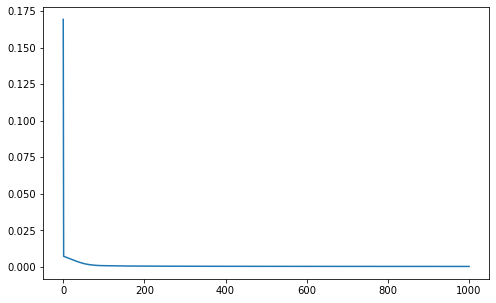

In [13]:
# Visualisation d'erreur en fonction de nombre d'iteration effectuée
iters = np.arange(0, iter_fin + 1)

rcParams['figure.figsize'] = 8,5
plt.plot(iters, errs)
plt.show()

<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">3 - Prédiction des données et le test :</h2>
</div>

<div>
        <p  style="font-family:Serif; font-size:17px;">La construction des données utilisées lors du test :</p>
</div>

In [14]:
# Test
data = scaled_data[len(scaled_data) - test_size - 30:]
data = data.reshape(-1,1)

<div>
        <p  style="font-family:Serif; font-size:17px;">Création du testX : </p>
</div>

In [15]:
testX = []
step = 30

for i in range(step, data.shape[0]):
    testX.append(data[i-step:i, 0])

testX = np.array(testX)

<div>
        <p  style="font-family:Serif; font-size:17px;">Commençons la prédiction :</p>
</div>

In [16]:
# prediction
test_predict = pmc.predict(testX) 

<div>
        <p  style="font-family:Serif; font-size:17px;">On inverse l'échelle des données prédies :</p>
</div>

In [17]:
# Inverser la mise a l'echelle
test_predict=scaler.inverse_transform(test_predict)

In [18]:
test_predict = np.array(test_predict)
test_predict = test_predict.reshape(-1,1)

<div>
        <p  style="font-family:Serif; font-size:17px;">La visualisation du graphe qui montre les indices prédies et les index exactes :</p>
</div>

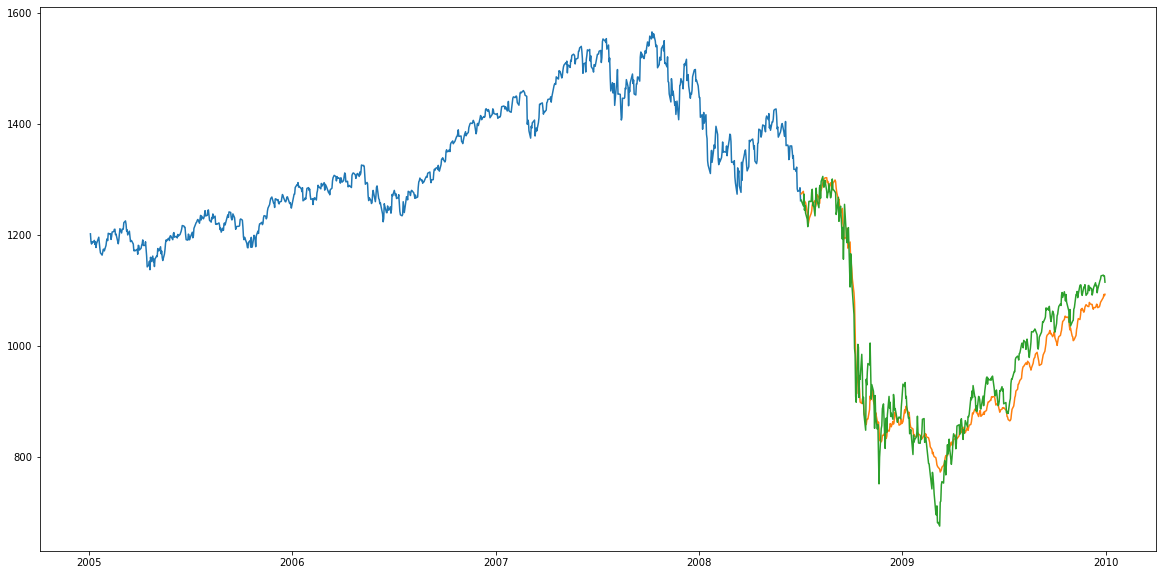

In [19]:
dt = copie[['Close']]
train_data = dt[:training_size]
test_data = dt.iloc[training_size:,:]

# Inserer la colonne prediction pour l'afficher sur le graphe
test_data.insert(1, "Prediction",test_predict)


# Visualisation de la valeur exacte et la prediction
rcParams['figure.figsize'] = 20,10
plt.plot(train_data)
plt.plot(test_data[["Prediction","Close"]])

<div>
    <h3 style="color:#3498db; font-family:Serif; font-size:22px;">Remarque :</h3>
        <p  style="font-family:Serif; font-size:17px;">Plus qu'on augmente le nombre de neurones plus qu'on approche de la valeur exacte. </p>
</div>

<div>
    <h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">Conclusion: </h2>
        <p  style="font-family:Serif; font-size:17px;">Une bonne prévision d’indices boursiers nécessite un ensemble de données importante et un suivi de l’évolution de la réglementation boursière. Les réseaux de neurones ont montré leur force et leur performance au niveau de prédiction dans le phénomène de financement et de prévision d’indices boursiers.</p>
</div>